Импорт фичей и инициализация сетки

In [1]:
import numpy as np
import opticaldevicelib_2d as od_2d

od_2d.OpticalDevice.init_values(new_dx=6e-8, new_dy=6e-8, new_Nx=2**10, new_Ny=2**10, gpu_use=True)
# od_2d.OpticalDevice.init_values(new_dx=5e-7, new_dy=5e-9, new_Nx=2**8, new_Ny=2**17, gpu_use=True)
# od_2d.OpticalDevice.init_values(new_dx=5e-7, new_dy=1e-8, new_Nx=2**7, new_Ny=2**15, gpu_use=True)
# M = 1
# od_2d.OpticalDevice.init_values(new_dx=8e-8*M, new_dy=8e-8/M, new_Nx=2**10/M, new_Ny=2**10*M, gpu_use=True)
print(f"границы поля X +- {od_2d.OpticalDevice.Nx * od_2d.OpticalDevice.dx * 1e6} мкм")
print(f"границы поля Y +- {od_2d.OpticalDevice.Ny * od_2d.OpticalDevice.dy * 1e6} мкм")

GPU is available!
GPU is available!
границы поля X +- 61.44 мкм
границы поля Y +- 61.44 мкм


Инициализация линзы для 2d сетки:

In [2]:
p = od_2d.PointSource(z=100, En=12, x0=0, y0=0) 

try:
    x, y = p.x[0].get()*1e6, p.y[:,0].get()*1e6
except:
    x, y = p.x*1e6, p.y*1e6

E_ps1 = p.E() / p.E() # плоская волна



N_gl = 26
Copy_flag = True
arr_len = 2 if Copy_flag else 2*N_gl

phases = 2*np.pi*np.random.rand(arr_len)
w_s = (np.random.rand(arr_len)-0.5)*np.pi/180*0
s_s  = (np.random.rand(arr_len)-0.5)*2e-6*0

crl2D = od_2d.CRL2D(lam=p.lam, arr_start=E_ps1, z=0,\
                 R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33)


crl1D = od_2d.CRL1D(lam=p.lam, arr_start=E_ps1, z=0, \
                 R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33, \
                    lt=50e-6)

crl2Dm = od_2d.CRL2Dm(lam=p.lam, arr_start=E_ps1, z=0, \
                   R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33, \
                   copy=Copy_flag, arr_phase=phases, arr_s=s_s, arr_w=w_s, \
                    b=3e-8, m=2.5)

# crl1Dm = od_2d.CRL1Dmm(lam=p.lam, arr_start=E_ps1, z=0, \
#                    R=6.25e-6, A=50e-6, d=2e-6, N_lens=N_gl, mol="Si", dens=2.33, \
#                    copy=Copy_flag, arr_phase=phases, arr_s=s_s, arr_w=w_s, \
#                     lt=50e-6, by=0, my=1.9, bx=0, mx=3e8)

crl_2d = crl1D # !!! SELECT TYPE OF CRL !!!
focus = crl_2d.focus()
crl_2d.set_z(z=focus)
print(f"фокусное расстояние = {focus * 1e3 :.3f} мм")
print(f"оценка макс. числа линз = {int(crl_2d.Lc() * np.pi / 2)}")

фокусное расстояние = 34.634 мм
оценка макс. числа линз = 149


Построение профиля поверхности элемента в 3D (при необходимости)

In [3]:
import numpy as np
import plotly.graph_objects as go
# Generate nicely looking random 3D-field


X, Y = np.meshgrid(x, y)
Z = crl_2d.T().get()*1e6
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1,
                    specs=[[{'is_3d': True}]],
                    )

fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorbar_x=-0.07))
# fig.add_trace(go.Surface(x=x, y=y, z=Z, surfacecolor=X**2 + Y**2 + Z**2), 1, 2)
fig.update_layout(
    width=800,
    height=800
)
xGrid, yGrid = np.meshgrid(x, y)
xRevGrid, yRevGrid = np.meshgrid(y, x)
line_marker = dict(color='black', width=2)

## add gridlines in one direction using mesh grid
for i, j, k in zip(xGrid, yGrid, Z):
    fig.add_trace(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker, showlegend=False)) # this works

## add gridlines in perpendicular direction using reverse mesh grid
for i, j, k in zip(xRevGrid, yRevGrid, Z.T):
    fig.add_trace(go.Scatter3d(x=j, y=i, z=k, mode='lines', line=line_marker, showlegend=False)) # this doesn't work

fig.update_layout(title='Mt Bruno Elevation', autosize=True,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.show(renderer='vscode')

KeyboardInterrupt: 

In [ ]:
fig.write_image('figure.png', scale=2)

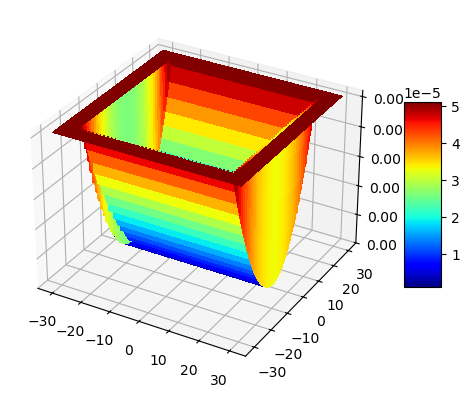

In [4]:
import matplotlib.pyplot as plt

T_arr = crl_2d.T()
try:
    T = T_arr.get()
    T2 = crl1D.T().get()
except:
    T = -T_arr
    T2 = -crl2D.T()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X__, Y__ = np.meshgrid(x, y)
Z__ = T

# Plot the surface.
surf = ax.plot_surface(X__, Y__, Z__, cmap="jet",
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(x, y)
Z = crl_2d.T().get()*1e6

fig1,ax1 = plt.subplots(1, 1)
# fig1.set_figheight(15)
# fig1.set_figwidth(15)
colbar = plt.pcolormesh(X, Y, Z)
cbar = fig1.colorbar(colbar)
cbar.set_label('$z$, μm')

# plt.title("Intensity distribution at the focus (an ideal CRL)")
# plt.axvline(x = 0, color = 'g', alpha=0.8, linewidth=0.5)
# plt.plot([x_cutted[0]*1e6, x_cutted[-1]*1e6], [focus*1e3, focus*1e3], 'g', alpha=0.8, linewidth=0.5)
# plt.plot([(dx_max*1e-6 - fwhm/2)*1e6, (dx_max*1e-6 + fwhm/2)*1e6], [(dz_max*1e-3 + focus)*1e3, (dz_max*1e-3 + focus)*1e3], marker='|', color="blue", linewidth=0.5)
plt.xlabel("$x$, μm")
plt.ylabel("$y$, μm")
plt.ylim(-50, 50)
# plt.savefig("100nm_2d", dpi=2400);

In [ ]:
X, Y = np.meshgrid(x, y)
# Z = crl_2d.T().get()*1e6

fig1,ax1 = plt.subplots(1, 1)
# fig1.set_figheight(15)
# fig1.set_figwidth(15)
colbar = plt.pcolormesh(X, Y, np.gradient(Z, axis=0))
cbar = fig1.colorbar(colbar)
cbar.set_label('$z$, μm')

# plt.title("Intensity distribution at the focus (an ideal CRL)")
# plt.axvline(x = 0, color = 'g', alpha=0.8, linewidth=0.5)
# plt.plot([x_cutted[0]*1e6, x_cutted[-1]*1e6], [focus*1e3, focus*1e3], 'g', alpha=0.8, linewidth=0.5)
# plt.plot([(dx_max*1e-6 - fwhm/2)*1e6, (dx_max*1e-6 + fwhm/2)*1e6], [(dz_max*1e-3 + focus)*1e3, (dz_max*1e-3 + focus)*1e3], marker='|', color="blue", linewidth=0.5)
plt.xlabel("$x$, μm")
plt.ylabel("$y$, μm")
plt.ylim(-50, 50)
# plt.savefig("100nm_2d", dpi=2400);

Численный расчет фокусного параметра в окрестности eps

In [ ]:
I_distr_max, I_max, dz_max, dy_max, dx_max, fwhm_y, fwhm_x, focus_images, z_arr, div_ang_x, div_ang_y, x_cutted, y_cutted\
     = crl_2d.focus_params(n_dots=200, eps=5e-3, ny_cut=150, nx_cut=150)
print(f" dz = {dz_max} mm \n dx = {dx_max} μm \n dy = {dy_max} μm \n fwhm_x = {fwhm_x*1e6} μm \n fwhm_y = {fwhm_y*1e6} μm \n I_max = {I_max} rel. un. \n div_ang_x = {div_ang_x} \n div_ang_y = {div_ang_y}")

# print(f" dz = {dz_max:.3f} mm \n dx = {dx_max:.3f} μm \n dy = {dy_max:.3f} μm \n fwhm_x = {fwhm_x*1e6:.3f} μm \n fwhm_y = {fwhm_y*1e6:.3f} μm \n I_max = {I_max:.1f} rel. un. \n div_ang_x = {div_ang_x} \n div_ang_y = {div_ang_y}")

In [ ]:
z_arr[2] - z_arr[1]

In [ ]:
dz_arr = z_arr-focus
index_zero = int(np.where(dz_arr==0)[0])
I_distr_zero = focus_images[index_zero]

In [ ]:
focus*1e3+dz_max

In [ ]:
import matplotlib.pyplot as plt
X, Y = np.meshgrid(x_cutted, y_cutted)
Z = I_distr_max.get()
# Z = I_distr_zero

fig1,ax1 = plt.subplots(1, 1)
# fig1.set_figheight(15)
# fig1.set_figwidth(15)
colbar = plt.pcolormesh(X, Y, Z, cmap='inferno')
cbar = fig1.colorbar(colbar)
cbar.set_label('$I$, a.u.')

# plt.title("Intensity distribution at the focus (an ideal CRL)")
# plt.axvline(x = 0, color = 'g', alpha=0.8, linewidth=0.5)
# plt.plot([x_cutted[0]*1e6, x_cutted[-1]*1e6], [focus*1e3, focus*1e3], 'g', alpha=0.8, linewidth=0.5)
# plt.plot([(dx_max*1e-6 - fwhm/2)*1e6, (dx_max*1e-6 + fwhm/2)*1e6], [(dz_max*1e-3 + focus)*1e3, (dz_max*1e-3 + focus)*1e3], marker='|', color="blue", linewidth=0.5)
plt.xlabel("$y$, μm")
plt.ylabel("$x$, μm")
plt.savefig("ideal_2d", dpi=2400);

In [ ]:
import plotly.graph_objects as go
# Create and show figure
fig = go.Figure(go.Heatmap(
    z=I_distr_max.get(), x=x_cutted, y=y_cutted, colorscale="Inferno"
    # colorbar=dict(
    #     x=0.2,
    #     xref="container",
    #     title="Surface Heat"
    # )
))
fig.update_layout(
    width=1200,
    height=1200
)
fig.write_image("images/fig1.png", dpi=1200)
fig.show()

Распределение интенсивности I(x, y) в зависимости от Z

In [ ]:
volume = focus_images.get()
r, c = volume[0].shape

# Define frames
import plotly.graph_objects as go
nb_frames = len(volume)


layout = go.Layout(xaxis=go.layout.XAxis(
    title=go.layout.xaxis.Title(
        text='x, μm',
    )),
yaxis=go.layout.YAxis(
    title=go.layout.yaxis.Title(
        text='y, μm',
    )
))


fig = go.Figure(layout=layout, frames=[go.Frame(data=go.Heatmap(
    z=volume[k], x=x_cutted, y=y_cutted, colorscale="hot", zmin=0, zmax=np.max(volume)
    ),
    name=str(k) # you need to name the frame for the animation to behave properly
    )
    for k in range(nb_frames)])

# Add data to be displayed before animation starts
fig.add_trace(go.Heatmap(
    z=volume[0], x=x_cutted, y=y_cutted,
    colorscale="hot", zmin=0, zmax=0,
    colorbar=dict(thickness=20, ticklen=4, title="I, rel. un.")
    ))


def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str("{:.2f}".format(1000*(float(z_arr[k])-focus))),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]


# Layout
fig.update_layout(
         title='Focal spot',
         width=1200,
         height=1200,
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)

fig.show()

Распределение интесивности при заданном Z

In [ ]:
# %matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Создаем массив данных (можно использовать свои данные)
# data = focus_images[np.max(np.where(z_arr-focus_2d<-1.5e-3))].T
data = I_distr_max
# Создаем начальный график по индексу 0
fig, ax = plt.subplots()
l, = ax.plot(data[0])
ax.set_ylim(0, np.max(data))
ax.set_xlim(y_cutted[0], y_cutted[-1])
ax.set_xlim(-4.5, 4.5)
# Создаем слайдер
axcolor = 'lightgoldenrodyellow'
slider_ax = plt.axes([0.2, 0.02, 0.65, 0.03], facecolor=axcolor)
slider = Slider(slider_ax, 'Index', 0, len(data)-1, valinit=0, valstep=1)

# Функция обновления графика по индексу
def update(val):
    index = int(slider.val)
    l.set_ydata(data[index])
    l.set_xdata(y_cutted)
    ax.set_title("$x$ = "+ f"{(x_cutted[index]):.1f} μм")
    plt.draw()

slider.on_changed(update)

plt.show()